In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

In [333]:
female_data = pd.read_csv("C:/Users/Farhad/Desktop/python/Machine_Learning/ANSUR_II_FEMALE_Public.csv")
#female_data.head()
male_data = pd.read_csv("C:/Users/Farhad/Desktop/python/Machine_Learning/ANSUR_II_MALE_Public.csv" , encoding='latin-1')
#male_data.head()

In [334]:
# جدا کردن 50 ردیف اول به‌صورت دیتا فریم (بدون تبدیل به لیست)
test_female_data = female_data.head(50).copy()  # استفاده از copy برای جلوگیری از مشکلات مرجع
test_male_data = male_data.head(50).copy()

In [335]:
# حذف 50 ردیف اول
female_data = female_data.iloc[50:]  # همه ردیف‌ها از 50 به بعد
#female_data.head()
# حذف 50 ردیف اول
male_data = male_data.iloc[50:]  # همه ردیف‌ها از 50 به بعد
#male_data.head()

In [336]:
data = pd.concat([female_data, male_data])
#data
data2 = pd.concat([test_female_data, test_male_data])
#data2

In [337]:
X_test = female_data.head(50)[['stature', 'weightkg']].values
Y_test = female_data.head(50)['Gender'].values
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_test shape: (50, 2)
Y_test shape: (50,)


In [338]:
#preprocess
data["weightkg"] = data["weightkg"] / 10 # convert to kg
data["stature"] = data["stature"] / 10   # convert to cm
data["Gender"] = data["Gender"].replace(["Female","Male"],[0,1])   # convert to binary

data2["weightkg"] = data2["weightkg"] / 10 # convert to kg
data2["stature"] = data2["stature"] / 10   # convert to cm
data2["Gender"] = data2["Gender"].replace(["Female","Male"],[0,1])   # convert to binary

C:\Users\Farhad\AppData\Local\Temp\ipykernel_18588\256994371.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Gender"] = data["Gender"].replace(["Female","Male"],[0,1])   # convert to binary
C:\Users\Farhad\AppData\Local\Temp\ipykernel_18588\256994371.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2["Gender"] = data2["Gender"].replace(["Female","Male"],[0,1])   # convert to binary


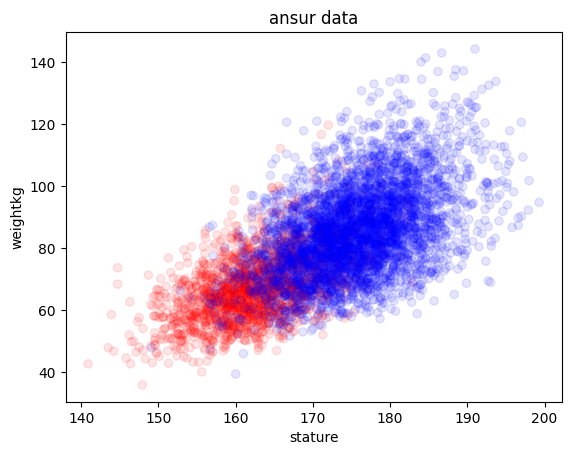

In [339]:
cmap = ["red" , "blue"]
plt.scatter(data["stature"] ,data["weightkg"] , c=data["Gender"] ,cmap=ListedColormap(cmap) , alpha=0.1)
plt.title("ansur data")
plt.xlabel('stature')
plt.ylabel('weightkg')
plt.show()

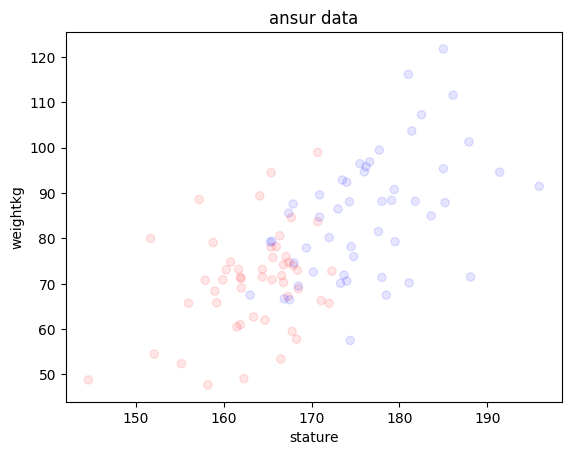

In [340]:
cmap = ["red" , "blue"]
plt.scatter(data2["stature"] ,data2["weightkg"] , c=data2["Gender"] ,cmap=ListedColormap(cmap) , alpha=0.1)
plt.title("ansur data")
plt.xlabel('stature')
plt.ylabel('weightkg')
plt.show()

In [ ]:
def generate_dataset(data):
    
    width = data["stature"]
    length = data["weightkg"]
    x = np.array((width , length)).T

    y = data["Gender"]
    
    return x , y

In [342]:
X_train , Y_train = generate_dataset(data)
X_test_custom, Y_test_custom = generate_dataset(data2)

In [343]:
from knn import KNN

In [344]:
knn = KNN(k = 11)
knn.fit(X_train,Y_train)

In [345]:
people_1 = np.array([100, 60])   # stature=170cm, weight=1kg (نیاز به تنظیم واحد)
people_2 = np.array([100, 100])
people_3 = np.array([4, 7])
people = (people_1 , people_2 , people_3)
outputs = knn.predict(people)

In [346]:
for output in outputs:
    if  output == 0:
        print("Female♀️")
    else:
        print("male♂️")

Female♀️
male♂️
Female♀️


In [347]:
Y_pred = knn.predict(X_test)

KeyError: '[4860, 4132, 4774, 5604] not in index'

In [ ]:
confusion_matrix = np.zeros((2,2))

for i in range(len(Y_test)):
    if Y_test[i] == 0 and Y_pred[i] == 0:
        confusion_matrix[0][0] += 1
    elif Y_test[i] == 0 and Y_pred[i] == 1:
        confusion_matrix[0][1] += 1
    elif Y_test[i] == 1 and Y_pred[i] == 0:
        confusion_matrix[1][0] += 1
    elif Y_test[i] == 1 and Y_pred[i] == 1:
        confusion_matrix[1][1] += 1
        
        
confusion_matrix

In [ ]:
plt.imshow(confusion_matrix)
plt.colorbar()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
knn.predict(people)

In [ ]:
knn.score(X_test,Y_test)